In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from core.finall_forecast import Forecaster
from dateutil.relativedelta import relativedelta
import datetime
from tqdm.auto import tqdm

import pyodbc
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import warnings; warnings.simplefilter('ignore')


In [2]:
#df = pd.read_csv('_AG_Footfall.csv')

In [3]:
class Data_Preprocess:
    def __init__(self, conn_str:tuple):
        self.cnxn = pyodbc.connect(conn_str)
        
    def generate_data(self):
        sql_query = """
            SELECT * FROM _AG_Footfall WHERE Frequency = 'M_1' and Unit_Type = 'ТРЦ' and Y >= 2021"""
        df = self.downloading_data(sql_query)
        df_new = df[['Project_ID', 'Project_Name', 'Frequency', 'Period', 'Value', 'Y']].groupby(['Project_ID','Project_Name', 'Frequency', 'Period', 'Y']).sum().reset_index()
    
        return df_new
    
    def downloading_data(self, sql_query:str)->pd.DataFrame:

        df = pd.read_sql(sql_query, self.cnxn)
        self.cnxn.close()

        return df

In [4]:
conn_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=sql2014;'
    r'DATABASE=devMARS;'
    r'Trusted_Connection=yes;'
)

In [5]:
df = Data_Preprocess(conn_str=conn_str).generate_data()

In [6]:
df

,Project_ID,Project_Name,Frequency,Period,Y,Value
0,06cd6b35-baf1-11e6-878c-6eae8b518839,Петербург Лето ТЦ / Petersburg Leto RC,M_1,2021-01-01,2021,523656.0
1,06cd6b35-baf1-11e6-878c-6eae8b518839,Петербург Лето ТЦ / Petersburg Leto RC,M_1,2021-02-01,2021,492752.0
2,06cd6b35-baf1-11e6-878c-6eae8b518839,Петербург Лето ТЦ / Petersburg Leto RC,M_1,2021-03-01,2021,625806.0
3,06cd6b35-baf1-11e6-878c-6eae8b518839,Петербург Лето ТЦ / Petersburg Leto RC,M_1,2021-04-01,2021,601819.0
4,06cd6b35-baf1-11e6-878c-6eae8b518839,Петербург Лето ТЦ / Petersburg Leto RC,M_1,2021-05-01,2021,682180.0
...,...,...,...,...,...,...
279,d8fb76e9-03e3-11e3-bdd2-001e4f38d486,Новосибирск Аура ТЦ / Novosibirsk Aura RC,M_1,2024-08-01,2024,610955.0
280,d8fb76e9-03e3-11e3-bdd2-001e4f38d486,Новосибирск Аура ТЦ / Novosibirsk Aura RC,M_1,2024-09-01,2024,505109.0
281,d8fb76e9-03e3-11e3-bdd2-001e4f38d486,Новосибирск Аура ТЦ / Novosibirsk Aura RC,M_1,2024-10-01,2024,525200.0
282,d8fb76e9-03e3-11e3-bdd2-001e4f38d486,Новосибирск Аура ТЦ / Novosibirsk Aura RC,M_1,2024-11-01,2024,530699.0


In [7]:
df_arr = []

for indx_ in tqdm(df['Project_Name'].unique()):
    print(indx_)
    forecast_2025 = Forecaster(
        data=df.loc[df['Project_Name']==indx_].sort_values('Period')['Value'].to_numpy(), 
        data_index=df.loc[df['Project_Name']==indx_][['Value', 'Period']].groupby('Period').sum().index.astype('datetime64[ns]'),
        project_id=df.loc[df['Project_Name']==indx_]['Project_ID'].iloc[-1],
        project_name=indx_,
        n_trials=20)

    pred = forecast_2025.predict(12) 
    df_arr.append(pred)
    

  0%|          | 0/6 [00:00<?, ?it/s]

[I 2025-01-08 11:31:23,971] A new study created in memory with name: no-name-0bf11c03-0905-4a96-996d-850fea8acbb9


Петербург Лето ТЦ / Petersburg Leto RC


[I 2025-01-08 11:42:45,283] Trial 1 finished with value: 18133793904.89307 and parameters: {'order': (np.int64(4), 1, np.int64(10)), 'seasonal_order': (np.int64(7), 1, np.int64(9), 12), 'trend': None}. Best is trial 1 with value: 18133793904.89307.
[I 2025-01-08 11:43:15,784] Trial 0 finished with value: 19113608624.20531 and parameters: {'order': (np.int64(4), 1, np.int64(9)), 'seasonal_order': (np.int64(4), 1, np.int64(8), 12), 'trend': 'ct'}. Best is trial 1 with value: 18133793904.89307.
[I 2025-01-08 11:43:18,129] Trial 3 finished with value: 18021555319.670036 and parameters: {'order': (np.int64(4), 1, np.int64(10)), 'seasonal_order': (np.int64(4), 1, np.int64(9), 12), 'trend': 'c'}. Best is trial 3 with value: 18021555319.670036.
[I 2025-01-08 11:44:02,362] Trial 6 finished with value: 18273744654.31783 and parameters: {'order': (np.int64(7), 1, np.int64(9)), 'seasonal_order': (np.int64(7), 1, np.int64(10), 12), 'trend': 'n'}. Best is trial 3 with value: 18021555319.670036.
[I 2

20241201
Уфа ТЦ / Ufa RC


[I 2025-01-08 12:07:16,812] Trial 4 finished with value: 32892544188.74797 and parameters: {'order': (np.int64(3), 1, np.int64(7)), 'seasonal_order': (np.int64(2), 1, np.int64(8), 12), 'trend': 'n'}. Best is trial 4 with value: 32892544188.74797.
[I 2025-01-08 12:07:29,616] Trial 0 finished with value: 51181471418.259605 and parameters: {'order': (np.int64(2), 1, np.int64(8)), 'seasonal_order': (np.int64(3), 1, np.int64(8), 12), 'trend': 'n'}. Best is trial 4 with value: 32892544188.74797.
[I 2025-01-08 12:07:31,754] Trial 1 finished with value: 31872678300.501846 and parameters: {'order': (np.int64(3), 1, np.int64(9)), 'seasonal_order': (np.int64(2), 1, np.int64(8), 12), 'trend': 'n'}. Best is trial 1 with value: 31872678300.501846.
[I 2025-01-08 12:08:08,188] Trial 5 finished with value: 32114374097.07599 and parameters: {'order': (np.int64(10), 1, np.int64(8)), 'seasonal_order': (np.int64(3), 1, np.int64(7), 12), 'trend': None}. Best is trial 1 with value: 31872678300.501846.
[I 202

20241201
Пермь ТЦ / Perm RC


[I 2025-01-08 12:21:28,035] Trial 1 finished with value: 23922874183.71005 and parameters: {'order': (np.int64(9), 1, np.int64(8)), 'seasonal_order': (np.int64(9), 1, np.int64(6), 12), 'trend': 'n'}. Best is trial 1 with value: 23922874183.71005.
[I 2025-01-08 12:22:08,058] Trial 4 finished with value: 24096371287.48792 and parameters: {'order': (np.int64(8), 1, np.int64(8)), 'seasonal_order': (np.int64(8), 1, np.int64(6), 12), 'trend': 'c'}. Best is trial 1 with value: 23922874183.71005.
[I 2025-01-08 12:22:24,427] Trial 5 finished with value: 19921226410.275402 and parameters: {'order': (np.int64(9), 1, np.int64(6)), 'seasonal_order': (np.int64(8), 1, np.int64(9), 12), 'trend': 'c'}. Best is trial 5 with value: 19921226410.275402.
[I 2025-01-08 12:22:44,705] Trial 6 finished with value: 20440583627.070602 and parameters: {'order': (np.int64(9), 1, np.int64(9)), 'seasonal_order': (np.int64(8), 1, np.int64(8), 12), 'trend': 't'}. Best is trial 5 with value: 19921226410.275402.
[I 2025-

20241201
Красноярск ТЦ / Krasnoyarsk RC


[I 2025-01-08 12:34:24,675] Trial 4 finished with value: 52950659272.4468 and parameters: {'order': (np.int64(3), 1, np.int64(5)), 'seasonal_order': (np.int64(3), 1, np.int64(4), 12), 'trend': 'ct'}. Best is trial 4 with value: 52950659272.4468.
[I 2025-01-08 12:35:10,338] Trial 6 finished with value: 52950659272.4468 and parameters: {'order': (np.int64(3), 1, np.int64(5)), 'seasonal_order': (np.int64(3), 1, np.int64(10), 12), 'trend': 'ct'}. Best is trial 4 with value: 52950659272.4468.
[I 2025-01-08 12:35:13,780] Trial 3 finished with value: 179552703516.4697 and parameters: {'order': (np.int64(3), 1, np.int64(4)), 'seasonal_order': (np.int64(5), 1, np.int64(4), 12), 'trend': None}. Best is trial 4 with value: 52950659272.4468.
[I 2025-01-08 12:35:17,944] Trial 5 finished with value: 68548138321.7916 and parameters: {'order': (np.int64(3), 1, np.int64(4)), 'seasonal_order': (np.int64(3), 1, np.int64(5), 12), 'trend': None}. Best is trial 4 with value: 52950659272.4468.
[I 2025-01-08 

20241201
Новокузнецк ТЦ/ Novokuznetsk RC


[I 2025-01-08 12:39:17,431] Trial 2 finished with value: 5305033184.310056 and parameters: {'order': (np.int64(3), 0, np.int64(3)), 'seasonal_order': (np.int64(4), 0, np.int64(4), 12), 'trend': 'n'}. Best is trial 2 with value: 5305033184.310056.
[I 2025-01-08 12:39:31,741] Trial 3 finished with value: 1152351494.2778146 and parameters: {'order': (np.int64(1), 0, np.int64(4)), 'seasonal_order': (np.int64(1), 0, np.int64(3), 12), 'trend': 'ct'}. Best is trial 3 with value: 1152351494.2778146.
[I 2025-01-08 12:39:33,748] Trial 4 finished with value: 922084147.1915408 and parameters: {'order': (np.int64(4), 0, np.int64(3)), 'seasonal_order': (np.int64(1), 0, np.int64(3), 12), 'trend': 'c'}. Best is trial 4 with value: 922084147.1915408.
[I 2025-01-08 12:39:46,112] Trial 5 finished with value: 945201245.1139688 and parameters: {'order': (np.int64(4), 0, np.int64(3)), 'seasonal_order': (np.int64(4), 0, np.int64(4), 12), 'trend': 'c'}. Best is trial 4 with value: 922084147.1915408.
[I 2025-0

20241201
Новосибирск Аура ТЦ / Novosibirsk Aura RC


[I 2025-01-08 12:46:14,379] Trial 5 finished with value: 25779881401.51839 and parameters: {'order': (np.int64(4), 1, np.int64(6)), 'seasonal_order': (np.int64(4), 1, np.int64(6), 12), 'trend': 'n'}. Best is trial 5 with value: 25779881401.51839.
[I 2025-01-08 12:46:17,592] Trial 4 finished with value: 25779881401.51839 and parameters: {'order': (np.int64(4), 1, np.int64(6)), 'seasonal_order': (np.int64(4), 1, np.int64(6), 12), 'trend': None}. Best is trial 5 with value: 25779881401.51839.
[I 2025-01-08 12:47:06,002] Trial 7 finished with value: 26294216482.69389 and parameters: {'order': (np.int64(4), 1, np.int64(6)), 'seasonal_order': (np.int64(4), 1, np.int64(6), 12), 'trend': 'c'}. Best is trial 5 with value: 25779881401.51839.
[I 2025-01-08 12:48:28,443] Trial 2 finished with value: 26300285191.261944 and parameters: {'order': (np.int64(3), 1, np.int64(8)), 'seasonal_order': (np.int64(4), 1, np.int64(8), 12), 'trend': 'c'}. Best is trial 5 with value: 25779881401.51839.
[I 2025-01

20241201


In [8]:
df_f = pd.concat(df_arr)

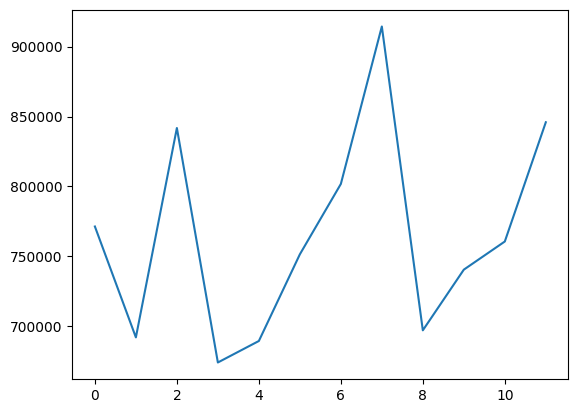

In [12]:
plt.plot(df_f.loc[df_f['Project_Name'].str.contains('Уфа') == True]['value'])

In [13]:
df_f

,Y,M,Project_Name,value,Forecast_date,Project_ID
0,2025,01,Петербург Лето ТЦ / Petersburg Leto RC,474359,20241201,06cd6b35-baf1-11e6-878c-6eae8b518839
1,2025,02,Петербург Лето ТЦ / Petersburg Leto RC,418087,20241201,06cd6b35-baf1-11e6-878c-6eae8b518839
2,2025,03,Петербург Лето ТЦ / Petersburg Leto RC,474932,20241201,06cd6b35-baf1-11e6-878c-6eae8b518839
3,2025,04,Петербург Лето ТЦ / Petersburg Leto RC,436797,20241201,06cd6b35-baf1-11e6-878c-6eae8b518839
4,2025,05,Петербург Лето ТЦ / Petersburg Leto RC,439480,20241201,06cd6b35-baf1-11e6-878c-6eae8b518839
...,...,...,...,...,...,...
7,2025,08,Новосибирск Аура ТЦ / Novosibirsk Aura RC,603874,20241201,d8fb76e9-03e3-11e3-bdd2-001e4f38d486
8,2025,09,Новосибирск Аура ТЦ / Novosibirsk Aura RC,529651,20241201,d8fb76e9-03e3-11e3-bdd2-001e4f38d486
9,2025,10,Новосибирск Аура ТЦ / Novosibirsk Aura RC,543397,20241201,d8fb76e9-03e3-11e3-bdd2-001e4f38d486
10,2025,11,Новосибирск Аура ТЦ / Novosibirsk Aura RC,491613,20241201,d8fb76e9-03e3-11e3-bdd2-001e4f38d486


In [14]:
df_f.to_csv('//sql2014/Import/Footfall_Forecast/predictions_visits_20241201.csv', index=False, encoding='utf-8-sig')

In [59]:
df_spb_pred = df_f.loc[df_f['Project_ID'] == '0d097e71-5cdf-11db-9eff-505054503030']
df_spb = df.loc[df['Project_ID'] == '0d097e71-5cdf-11db-9eff-505054503030']

In [65]:
df_spb['M'] = df_spb['Period'].astype(str).str.split('-', expand=True)[1]

In [66]:
df_spb['indx'] = df_spb['Y'].astype(str)+'-'+df_spb['M'].astype(str)
df_spb_pred['indx'] = df_spb_pred['Y'].astype(str)+'-'+df_spb_pred['M'].astype(str)

In [11]:
import matplotlib.pyplot as plt

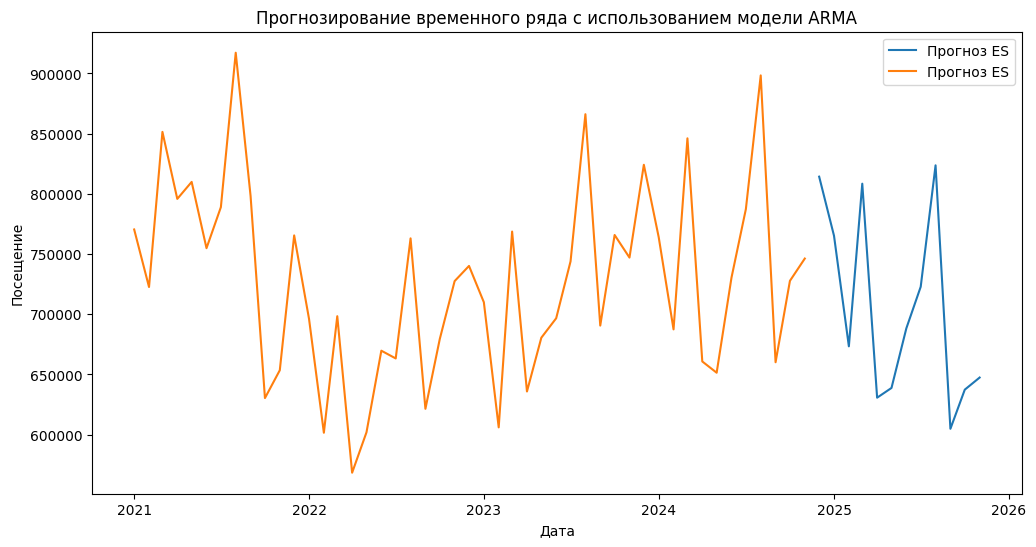

In [68]:
fig, axs = plt.subplots(figsize=(12,6))
axs.plot(df_spb_pred['indx'].astype('datetime64[ns]'), df_spb_pred['value'], label='Прогноз ES')
axs.plot(df_spb['indx'].astype('datetime64[ns]'), df_spb['Value'], label='Прогноз ES')
axs.set_title('Прогнозирование временного ряда с использованием модели ARMA')
axs.set_xlabel('Дата')
axs.set_ylabel('Посещение')
plt.legend()

In [93]:
from itertools import combinations

In [94]:
data = [[1, 2, 3], [1, 2, 3]]

# Создаем уникальные пары
unique_pairs = []
for lst in data:
    pairs = list(combinations(lst, 2))  # Генерируем все возможные пары
    unique_pairs.extend(pairs)

# Убираем дубликаты
unique_pairs = list(set(unique_pairs))
    
    

In [95]:
unique_pairs

[(2, 3), (1, 2), (1, 3)]

In [101]:
df_f.to_numpy().T.shape[-1]

72

In [2]:
import pyautogui
import time

def click_mouse(interval):
    try:
        while True:
            pyautogui.click()
            time.sleep(interval)
    except KeyboardInterrupt:
        print("Автокликер остановлен.")

# Задайте интервал между кликами в секундах
interval = 1  # например, 1 секунда
print("Автокликер запущен. Нажмите Ctrl+C для остановки.")
click_mouse(interval)


Автокликер запущен. Нажмите Ctrl+C для остановки.
Автокликер остановлен.
